In [1]:
import pandas as pd
import logging
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [25]:
#######################################
#### Normalization


def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.
    
    [0,1] 로 스케일링 하려면 min_max normalization을 사용. z-normalization은 평균(0) 근처로 모이게 만드는 것임. 음수도 나올 수 있음.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test  - test set, a 2D numpy array of size (num_instances, num_features)
    Returns:
        train_normalized - training set after normalization
        test_normalized  - test set after normalization

    """
    # TODO
    if len(train) == 0 or len(train[0]) == 0:
        print('train set must contain at least one row and one column.')
        return
    
    if len(test) == 0 or len(test[0]) == 0:
        print('test set must contain at least one row and one column.')
        return
        
    for i in range(len(train[0])):
        train_col_temp = train[:,i]
        test_col_temp = test[:,i]
        train_col_temp_max = train_col_temp.max()
        train_col_temp_min = train_col_temp.min()
        
        train_col_temp = (train_col_temp - train_col_temp_min)/(train_col_temp_max - train_col_temp_min)
        """
         넘파이 배열 - 스칼라값 을 하면 배열의 각 원소에 스칼라값을 뺀 배열을 반환
         min-max normalization은 min과 max사이에서 각 값의 상대적 위치를 계산한다.
        """
        
        
        test_col_temp = (test_col_temp - train_col_temp_min)/(train_col_temp_max - train_col_temp_min)
        
        """
         왜 test 데이터에도 train 데이터의 max,min을 사용할 까?
         test의 max,min을 쓰면 학습에 사용한 train과 같은 분포에서 온거라고 생각할 수 없기 때문이다. 즉 train과 test는
         같은 데이터 분포로부터 온것이고 이 데이터 분포를 train의 min,max를 이용해서 스케일링 해준거라고 보면 된다.
         만일 test에 대해서 따로 test의 min,max로 스케일링 하면 train에서 스케일링한 데이터의 분포와는 다른 분포가 된다.
         쉽게 얘기하면 학습 때는 train의 min,max를 이용했으므로 테스트할 때 도 학습에 이용한 것을 써줘야 한다.
        """
        train[:,i] = train_col_temp
        test[:,i] = test_col_temp  ## 할당을 다시 해줘야 바뀜.
        
#     print('normalization completed')
    return train, test

아래의 함수는 다른 형식으로 짜여진 것을 가져옴. 나중에 참고하기.

In [ ]:
# def feature_normalization(train, test):
#     # Record the maximun value of each instance in train
#     def dis2min(row):
#         return row-min(row)
#     dis2min_train=np.apply_along_axis(dis2min,axis=1,arr=train)
#     instances_max = np.apply_along_axis(max,axis=1,arr=dis2min_train)
#     # Calculate 1/max and convert it into a diagonal matrix
#     multiplier = np.diag(1/instances_max)
#     dis2min_test=np.apply_along_axis(dis2min,axis=1,arr=test)
#     return np.dot(multiplier,dis2min_train),np.dot(multiplier,dis2min_test)

In [26]:
sample1 =np.array([[  0.       ,10.     ],
         [  0.13216  ,12.11837],
         [  0.25379  ,42.05027],
         [  0.30874  ,13.11784]])
sample2 =np.array([[  0.       ,11.     ],
         [  0.13216  ,12.11837],
         [  0.25379  ,42.05027],
         [  0.30874  ,13.11784]])

In [27]:
sample1, sample2 = feature_normalization(sample1, sample2)

In [28]:
sample1

array([[0.        , 0.        ],
       [0.42806245, 0.06609523],
       [0.82201853, 1.        ],
       [1.        , 0.09727968]])

In [29]:
sample2

array([[0.        , 0.03120099],
       [0.42806245, 0.06609523],
       [0.82201853, 1.        ],
       [1.        , 0.09727968]])

In [79]:
########################################
#### The square loss function

def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the square loss for predicting y with X*theta

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)

    Returns:
        loss - the square loss, scalar
    """
    loss = 0 #initialize the square_loss
    #TODO
    loss = np.dot(X,theta) - y

    loss = np.linalg.norm(loss, ord = 2)**2 ## ord =1 로하면 l1 norm을 계산
   
#     loss = loss/(len(X)*2)
    loss = loss/len(X)
 
    return loss


In [8]:
X = np.array([[1,2,3],[4,5,6]])
y = np.array([7,8])
theta = np.array([1,2,3])

In [9]:
compute_square_loss(X, y, theta)

312.5

In [80]:
def compute_square_loss_gradient(X, y, theta):
    """
    Compute gradient of the square loss (as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    #TODO
    grad = np.dot(X,theta) - y
    grad = np.dot(X.T,grad)
#     grad = 1.0/X.shape[0]*grad
    grad = 2.0/X.shape[0]*grad ## grad = 2.0*grad/X.shape[0] 로 하면 overflow가 일어남. 2.0*grad에서 오버플로우가 나는 것 같다.

 
    return grad

In [11]:
X = np.array([[1,2,3],[4,5,6]])
y = np.array([7,8])
theta = np.array([1,2,3])

In [60]:
compute_square_loss_gradient(X, y, theta)

array([260., 308., 356.])

In [13]:
###########################################
### Gradient Checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm.  Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
    (e_1 = (1,0,0,...,0), e_2 = (0,1,0,...,0), ..., e_d = (0,...,0,1)

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
    ( J(theta + epsilon * e_i) - J(theta - epsilon * e_i) ) / (2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicate whether the gradient is correct or not

    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #the true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    #TODO
    

In [71]:
#################################################
### Generic Gradient Checker
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. And check whether gradient_func(X, y, theta) returned
    the true gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    #TODO
    true_gradient = gradient_func(X, y, theta)
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features)
    
    for i in range(num_features):
        h = np.zeros(num_features)
        h[i] = epsilon
        approx_grad[i] = ( objective_func(X, y, theta+h) - objective_func(X, y, theta-h) )/(2*epsilon)

    diff = gradient_func(X, y, theta) - approx_grad

    distance = np.linalg.norm(diff)
#     print('gradient correctly computed ') if distance < tolerance else print('gradient incorrectly computed ')
    return distance < tolerance

In [53]:
X = np.array([[1,2,3],[4,5,6],[7,8,9]])
y = np.array([7,8,9])
theta = np.array([1,2,3])

In [75]:
generic_gradient_checker(X, y, theta, compute_square_loss, compute_square_loss_gradient)


True

In [33]:
####################################
#### Batch Gradient Descent
def batch_grad_descent(X, y, alpha=0.1, num_iter=1000, check_gradient=False):
    """
    In this question you will implement batch gradient descent to
    minimize the square loss objective

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_iter - number of iterations to run
        check_gradient - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - store the the history of parameter vector in iteration, 2D numpy array of size (num_iter+1, num_features)
                    for instance, theta in iteration 0 should be theta_hist[0], theta in ieration (num_iter) is theta_hist[-1]
        loss_hist - the history of objective function vector, 1D numpy array of size (num_iter+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_iter+1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_iter+1) #initialize loss_hist
    theta = np.zeros(num_features) #initialize theta
    #TODO
    loss_hist[0] = compute_square_loss(X, y, theta)
    theta_hist[0] = theta
    for i in range(1,num_iter+1):
        
        if check_gradient:
            if generic_gradient_checker(X, y, theta, compute_square_loss, compute_square_loss_gradient) == False:
                print('gradient computation have failed at step '+ str(i) +  ' and alpha ' + str(alpha))
                print('gradient descent algorithm stopped')
                break
            
        theta = theta - alpha*compute_square_loss_gradient(X, y, theta)
        theta_hist[i] = theta
        loss_hist[i] = compute_square_loss(X, y, theta)
    
    return theta_hist, loss_hist
####################################
###Q2.4b: Implement backtracking line search in batch_gradient_descent
###Check http://en.wikipedia.org/wiki/Backtracking_line_search for details
#TODO

In [83]:
##이거 실행하기전에 밑에 main() 먼저 실행.
theta_hist = []
loss_hist = []
for alpha in [0.01,0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]:
    t, l = batch_grad_descent(X_train, y_train, alpha, check_gradient=True)
    theta_hist.append(t)
    loss_hist.append(l)

gradient computation have failed at step 13 and alpha 0.1
gradient descent algorithm stopped
gradient computation have failed at step 8 and alpha 0.2
gradient descent algorithm stopped
gradient computation have failed at step 7 and alpha 0.3
gradient descent algorithm stopped
gradient computation have failed at step 6 and alpha 0.4
gradient descent algorithm stopped
gradient computation have failed at step 6 and alpha 0.5
gradient descent algorithm stopped


# 발산하지 않는 범위에서는 알파가 클수록 수렴이 빠르다.

### 만일 목적함수를 $$\frac{1}{m}(x \theta - y)^{T}(x \theta - y)$$가 아닌 $$\frac{1}{2m}(x \theta - y)^{T}(x \theta - y)$$로 할 경우 0.1까지는 수렴하고 0.2부터는 발산한다. $$\frac{1}{2m}(x \theta - y)^{T}(x \theta - y)$$의 경우는 gradient가 절반으로 작아지기 때문이다.

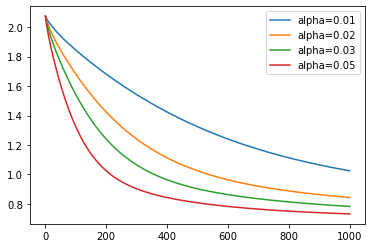

In [84]:
# plt.plot(range(len(loss_hist_0_1)),np.log(loss_hist_0_1),label="alpha=0.1")
# plt.plot(range(len(loss_hist_0_05)),np.log(loss_hist_0_05),label="alpha=0.05")
# plt.plot(range(len(loss_hist_0_01)),np.log(loss_hist_0_01),label="alpha=0.01")
i = -1
for alpha in [0.01, 0.02, 0.03, 0.05]:
    i += 1
    plt.plot(range(len(loss_hist[i])),np.log(loss_hist[i]),label="alpha="+str(alpha))
plt.legend(loc = 1)
plt.show()

In [125]:
###################################################
### Compute the gradient of Regularized Batch Gradient Descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    #TODO
    grad = np.dot(X,theta) - y
    grad = np.dot(X.T,grad)
    grad = 2.0/X.shape[0]*grad +2.0*lambda_reg*theta/X.shape[0] ## 원래는 2.0*lambda_reg*theta인데 발산해서 바꿨다.
    ## regularization term도 데이터개수로 나눠주는게 맞는 것 같음. 그래야 cost term과 regularization term의 스케일이 비슷해질듯.
    ## 그리고 이렇게 하는게 파비클래스에서 배운거기도 하고.
    ## 물론 데이터 개수로 안나눠주고 lambda를 매우매우 작게 해줘도 되긴 한다. 그렇게 해도 똑같음.

 
    return grad

In [168]:
X = np.array([1,2,3])
y = np.array(7)
theta = np.array([1,2,3])
np.dot(X,theta)

14

In [169]:
compute_regularized_square_loss_gradient(X, y, theta, 2)

array([ 6., 12., 18.])

In [147]:
np.dot(X,theta)

14

In [128]:
def regularized_grad_descent(X, y, alpha=0.01, lambda_reg=1, num_iter=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        numIter - number of iterations to run

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_iter+1, num_features)
        loss_hist - the history of loss function without the regularization term, 1D numpy array.
    """
    (num_instances, num_features) = X.shape
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_iter+1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_iter+1) #Initialize loss_hist
    #TODO
    
    loss_hist[0] = compute_square_loss(X, y, theta)
    theta_hist[0] = theta
    for i in range(1,num_iter+1):
        
            
        theta = theta - alpha*compute_regularized_square_loss_gradient(X, y, theta, lambda_reg)
        theta_hist[i] = theta
        loss_hist[i] = compute_square_loss(X, y, theta)
    
    return theta_hist, loss_hist
    

#############################################
## Visualization of Regularized Batch Gradient Descent
##X-axis: log(lambda_reg)
##Y-axis: square_loss

In [129]:
theta_hist = []
loss_hist = []
for lambda_reg_candi in [1e-10, 1e-7, 1e-5, 1e-3, 1e-1, 1, 10, 100, 1000]:
    t, l = regularized_grad_descent(X_train, y_train, lambda_reg=lambda_reg_candi)
    loss_hist.append(l)
    theta_hist.append(t)

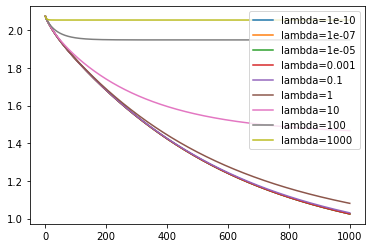

In [130]:
i = -1
for lambda_reg in [1e-10, 1e-7, 1e-5, 1e-3, 1e-1, 1, 10, 100, 1000]:
    i += 1
    plt.plot(range(len(loss_hist[i])),np.log(loss_hist[i]),label="lambda="+str(lambda_reg))
plt.legend(loc = 1)
plt.show()

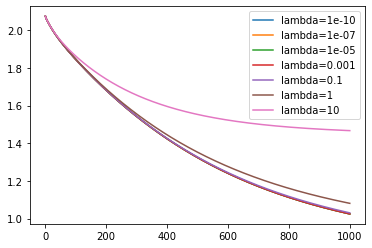

In [131]:
i = -1
for lambda_reg in [1e-10, 1e-7, 1e-5, 1e-3, 1e-1, 1, 10]:
    i += 1
    plt.plot(range(len(loss_hist[i])),np.log(loss_hist[i]),label="lambda="+str(lambda_reg))
plt.legend(loc = 1)
plt.show()

In [173]:
#############################################
### Stochastic Gradient Descent
def stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=1, num_epoch=1000):
    """
    In this question you will implement stochastic gradient descent with a regularization term

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float. step size in gradient descent
                NOTE: In SGD, it's not always a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every iteration is alpha.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t)
                if alpha == "1/t", alpha = 1/t
        lambda_reg - the regularization coefficient
        num_iter - number of epochs (i.e number of times) to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_iter, num_instances, num_features)
        loss hist - the history of regularized loss function vector, 2D numpy array of size(num_iter, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta


    theta_hist = np.zeros((num_epoch, num_instances, num_features))  #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist

    
    #TODO
    if alpha == "1/sqrt(t)":
        
        for e in range(1, num_epoch+1):
            alpha = 1/np.sqrt(e)
            for i in range(X.shape[0]):
                theta = theta - alpha*compute_regularized_square_loss_gradient(X[i], y[i], theta, lambda_reg)
                theta_hist[e-1][i] = theta
                loss_hist[e-1][i] = compute_square_loss(X, y, theta) + np.linalg.norm(theta)**2/num_instances*lambda_reg
                
    elif alpha == "1/t":
        
        for e in range(1, num_epoch+1):
            alpha = 1/e
            for i in range(X.shape[0]):
                theta = theta - alpha*compute_regularized_square_loss_gradient(X[i], y[i], theta, lambda_reg)
                theta_hist[e-1][i] = theta
                loss_hist[e-1][i] = compute_square_loss(X, y, theta)+ np.linalg.norm(theta)**2/num_instances*lambda_reg
    else:
        
        for e in range(1, num_epoch+1):
            for i in range(X.shape[0]):
                theta = theta - alpha*compute_regularized_square_loss_gradient(X[i], y[i], theta, lambda_reg)
                theta_hist[e-1][i] = theta
                loss_hist[e-1][i] = compute_square_loss(X, y, theta)+ np.linalg.norm(theta)**2/num_instances*lambda_reg
    
    return theta_hist, loss_hist
        

################################################
### Visualization that compares the convergence speed of batch
###and stochastic gradient descent for various approaches to step_size
##X-axis: Step number (for gradient descent) or Epoch (for SGD)
##Y-axis: log(objective_function_value) and/or objective_function_value


In [155]:
if type(3) == 'int':
    print('good')
print(type(3))

<class 'int'>


## fixed stepsize여도 수렴은 잘 하는걸로 보인다.

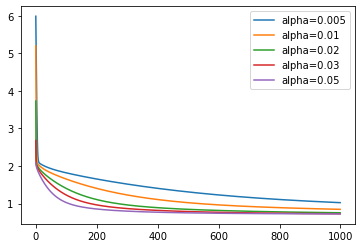

In [179]:

for alpha in [0.005, 0.01, 0.02, 0.03, 0.05]:
    
    theta_hist, loss_hist = stochastic_grad_descent(X_train, y_train, alpha, lambda_reg=0.001, num_epoch=1000)
    loss_hist_epoch = []
    for i in range(len(loss_hist)):
        loss_hist_epoch.append(loss_hist[i][-1])
    plt.plot(range(len(loss_hist_epoch)),np.log(loss_hist_epoch),label="alpha="+str(alpha))
plt.legend(loc = 1)
plt.show()

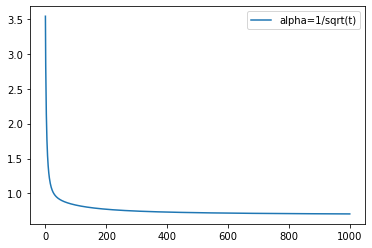

In [180]:
theta_hist, loss_hist = stochastic_grad_descent(X_train, y_train, alpha="1/sqrt(t)", lambda_reg=0.001, num_epoch=1000)
loss_hist_epoch = []
for i in range(len(loss_hist)):
    loss_hist_epoch.append(loss_hist[i][-1])
plt.plot(range(len(loss_hist_epoch)),np.log(loss_hist_epoch),label="alpha=1/sqrt(t)")
plt.legend(loc = 1)
plt.show()

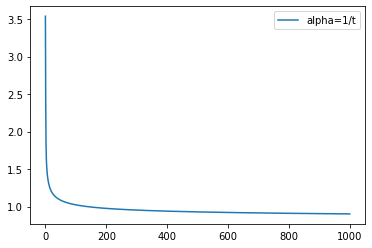

In [176]:
theta_hist, loss_hist = stochastic_grad_descent(X_train, y_train, alpha="1/t", lambda_reg=0.001, num_epoch=1000)
loss_hist_epoch = []
for i in range(len(loss_hist)):
    loss_hist_epoch.append(loss_hist[i][-1])
plt.plot(range(len(loss_hist_epoch)),np.log(loss_hist_epoch),label="alpha=1/t")
plt.legend(loc = 1)
plt.show()

## 1/sqrt(t), 1/t의 수렴속도가 빠르다.

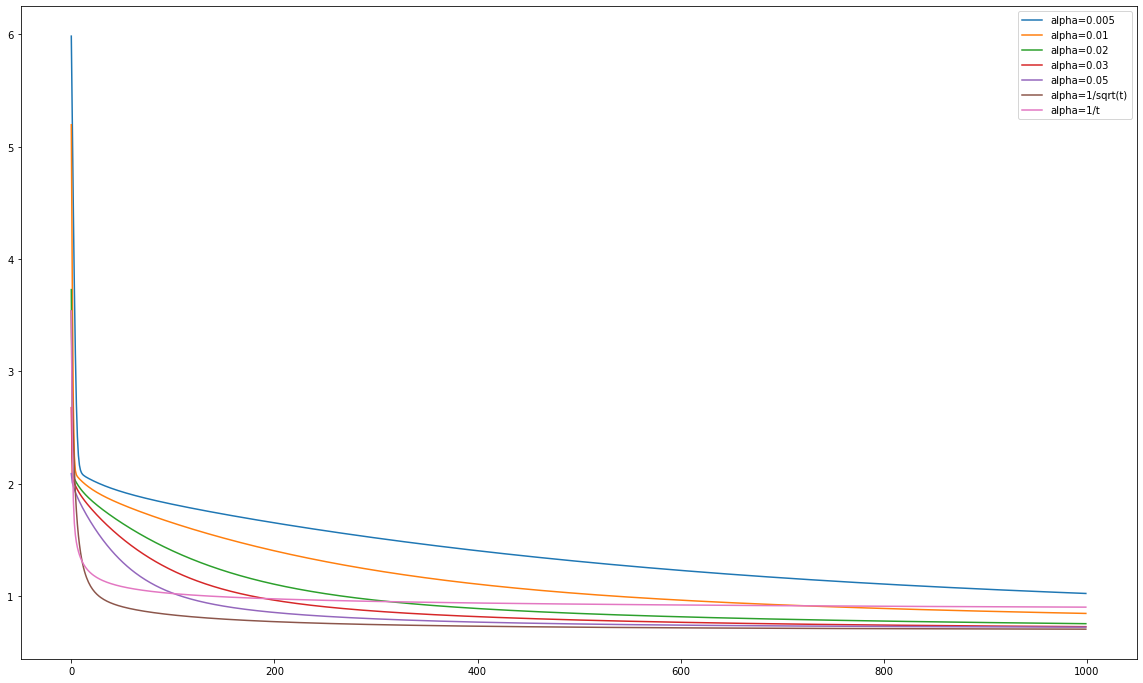

In [183]:
plt.figure(figsize=(20,12))
for alpha in [0.005, 0.01, 0.02, 0.03, 0.05]:
    
    theta_hist, loss_hist = stochastic_grad_descent(X_train, y_train, alpha, lambda_reg=0.001, num_epoch=1000)
    loss_hist_epoch = []
    for i in range(len(loss_hist)):
        loss_hist_epoch.append(loss_hist[i][-1])
    plt.plot(range(len(loss_hist_epoch)),np.log(loss_hist_epoch),label="alpha="+str(alpha))
    
    
theta_hist, loss_hist = stochastic_grad_descent(X_train, y_train, alpha="1/sqrt(t)", lambda_reg=0.001, num_epoch=1000)
loss_hist_epoch = []
for i in range(len(loss_hist)):
    loss_hist_epoch.append(loss_hist[i][-1])
plt.plot(range(len(loss_hist_epoch)),np.log(loss_hist_epoch),label="alpha=1/sqrt(t)")


theta_hist, loss_hist = stochastic_grad_descent(X_train, y_train, alpha="1/t", lambda_reg=0.001, num_epoch=1000)
loss_hist_epoch = []
for i in range(len(loss_hist)):
    loss_hist_epoch.append(loss_hist[i][-1])
plt.plot(range(len(loss_hist_epoch)),np.log(loss_hist_epoch),label="alpha=1/t")
plt.legend(loc = 1)
plt.show()

In [ ]:
plt.legend(loc = 1)
plt.show()

In [159]:
a = np.array([1,2,3])
a.T


array([1, 2, 3])

In [44]:
def main():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('data.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1)))) # Add bias term

    # TODO
    return X_train, X_test, y_train, y_test

In [139]:
if __name__ == "__main__":
    X_train, X_test, y_train, y_test = main()
    print(X_train.shape)

loading the dataset
Split into Train and Test
Scaling all to [0, 1]
(100, 49)
